<a href="https://colab.research.google.com/github/Blueorchid1711/ML/blob/main/Bivariate_AP23110010113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishikeshkonapure/home-loan-approval")

print("Path to dataset files:", path)

100%|██████████| 12.6k/12.6k [00:00<00:00, 6.65MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rishikeshkonapure/home-loan-approval/versions/1


In [ ]:
import os
print(os.listdir(path))

['loan_sanction_test.csv', 'loan_sanction_train.csv']


In [ ]:
file_path = path + "/loan_sanction_train.csv"
df_bivariate = pd.read_csv(file_path)

In [ ]:
display(df_bivariate.head())
display(df_bivariate.info())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

In [ ]:
# Identify columns for each plot type

# Continuous-Continuous: ApplicantIncome and LoanAmount
# Check for missing values and impute or drop if necessary
df_bivariate['LoanAmount'] = df_bivariate['LoanAmount'].fillna(df_bivariate['LoanAmount'].median())
df_bivariate['ApplicantIncome'] = df_bivariate['ApplicantIncome'].fillna(df_bivariate['ApplicantIncome'].median())


# Categorical-Categorical: Married and Dependents
# Check for missing values and impute or drop if necessary
df_bivariate['Married'] = df_bivariate['Married'].fillna(df_bivariate['Married'].mode()[0])
df_bivariate['Dependents'] = df_bivariate['Dependents'].fillna(df_bivariate['Dependents'].mode()[0])

# Categorical-Continuous: Education and ApplicantIncome
# Check for missing values and impute or drop if necessary (ApplicantIncome handled above)

# Ensure data types are appropriate (already checked in previous step, they are suitable)

# Display info to confirm changes
display(df_bivariate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

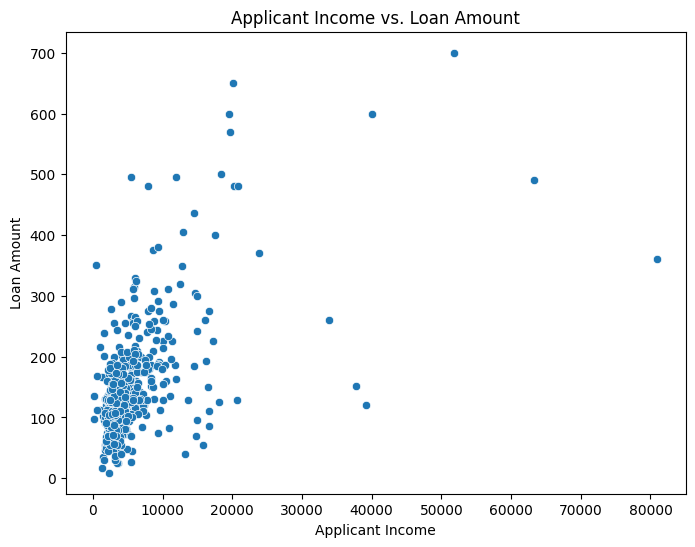

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_bivariate, x='ApplicantIncome', y='LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs. Loan Amount')
plt.show()

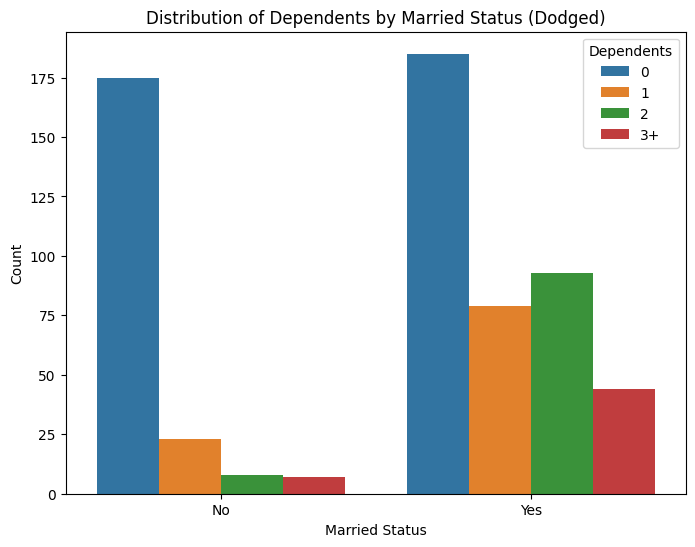

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_bivariate, x='Married', hue='Dependents')
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.title('Distribution of Dependents by Married Status (Dodged)')
plt.show()

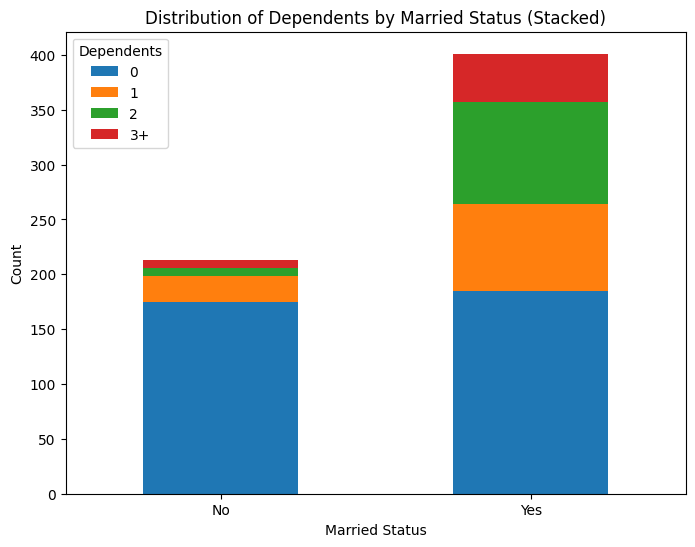

In [ ]:
stacked_data = df_bivariate.groupby(['Married', 'Dependents']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
stacked_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.title('Distribution of Dependents by Married Status (Stacked)')
plt.xticks(rotation=0)
plt.legend(title='Dependents')
plt.show()

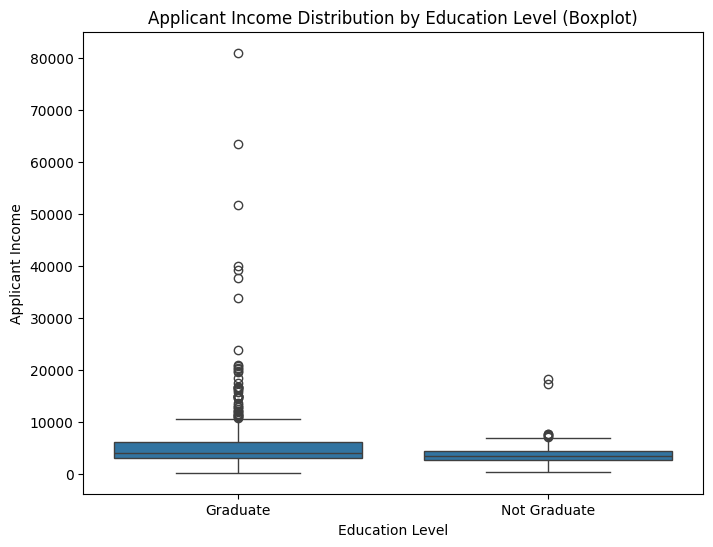

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_bivariate, x='Education', y='ApplicantIncome')
plt.xlabel('Education Level')
plt.ylabel('Applicant Income')
plt.title('Applicant Income Distribution by Education Level (Boxplot)')
plt.show()

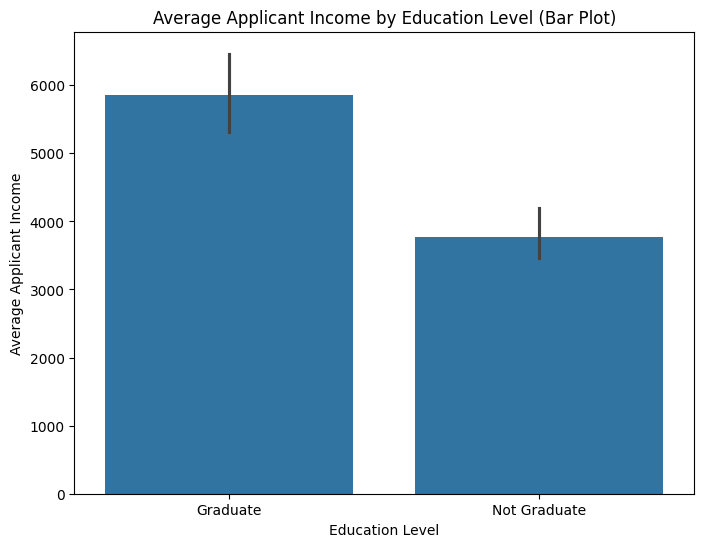

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_bivariate, x='Education', y='ApplicantIncome')
plt.xlabel('Education Level')
plt.ylabel('Average Applicant Income')
plt.title('Average Applicant Income by Education Level (Bar Plot)')
plt.show()

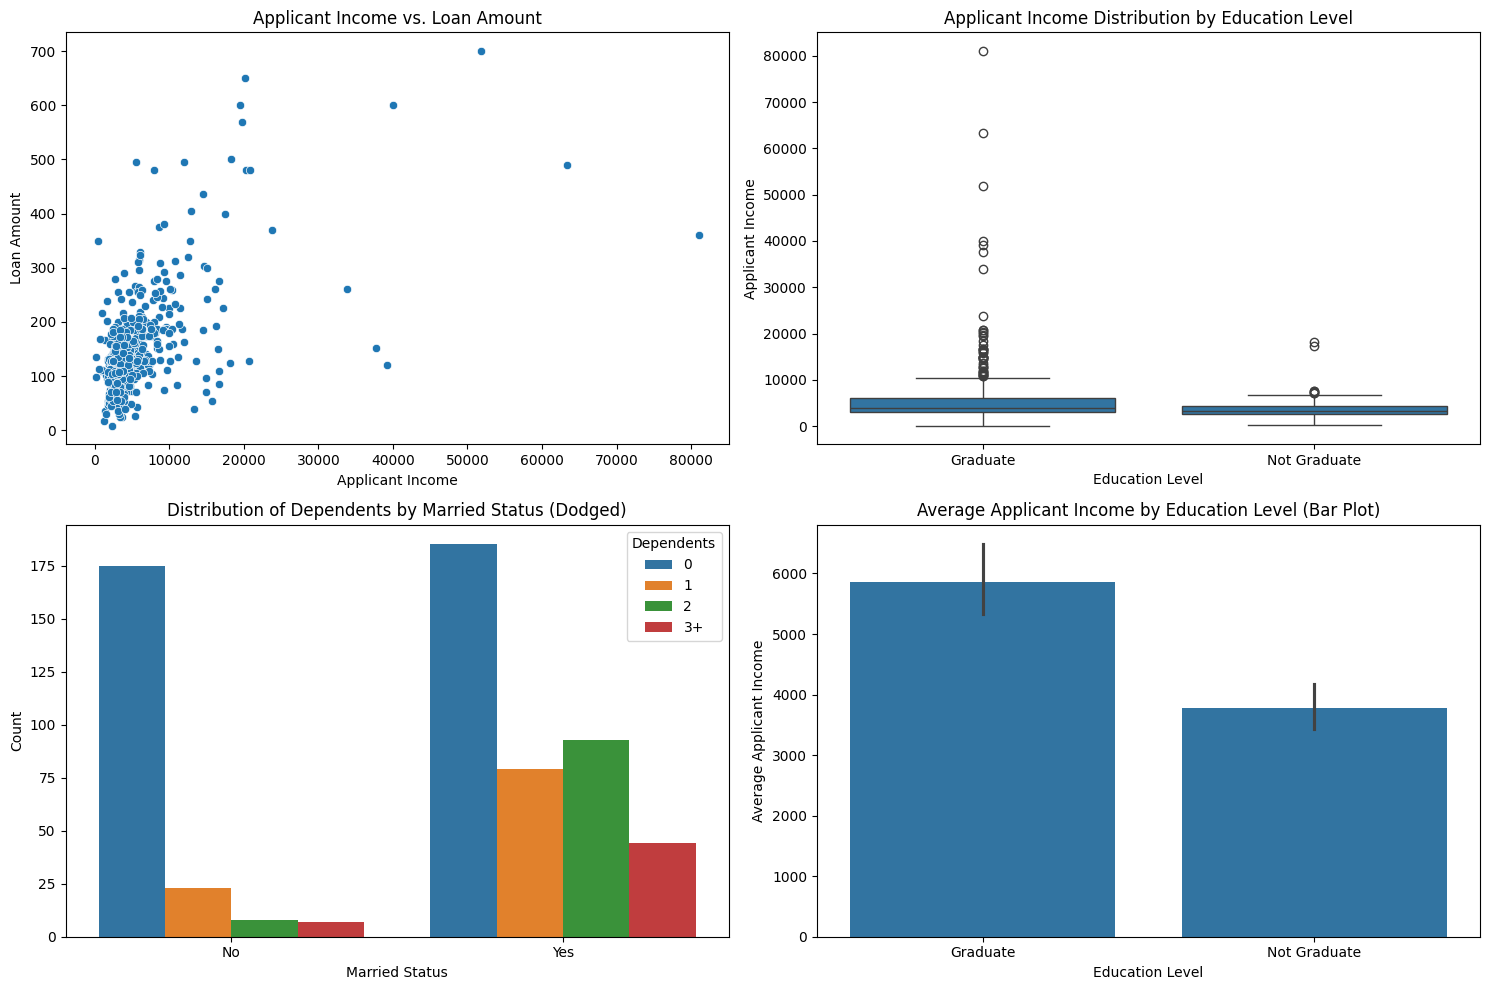

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot (Continuous-Continuous)
sns.scatterplot(data=df_bivariate, x='ApplicantIncome', y='LoanAmount', ax=axes[0, 0])
axes[0, 0].set_title('Applicant Income vs. Loan Amount')
axes[0, 0].set_xlabel('Applicant Income')
axes[0, 0].set_ylabel('Loan Amount')

# Boxplot (Categorical-Continuous)
sns.boxplot(data=df_bivariate, x='Education', y='ApplicantIncome', ax=axes[0, 1])
axes[0, 1].set_title('Applicant Income Distribution by Education Level')
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Applicant Income')

# Dodged Countplot (Categorical-Categorical)
sns.countplot(data=df_bivariate, x='Married', hue='Dependents', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Dependents by Married Status (Dodged)')
axes[1, 0].set_xlabel('Married Status')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Dependents')

# Bar plot (Categorical-Continuous)
sns.barplot(data=df_bivariate, x='Education', y='ApplicantIncome', ax=axes[1, 1])
axes[1, 1].set_title('Average Applicant Income by Education Level (Bar Plot)')
axes[1, 1].set_xlabel('Education Level')
axes[1, 1].set_ylabel('Average Applicant Income')


plt.tight_layout()
plt.show()

/tmp/ipython-input-1052885999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bivariate, x='Education', y='ApplicantIncome', palette='viridis')


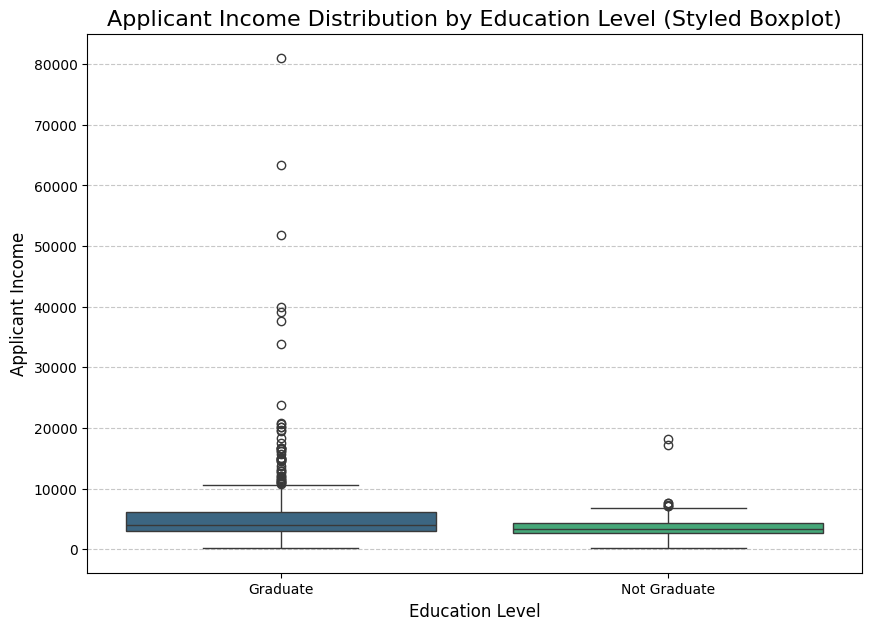

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_bivariate, x='Education', y='ApplicantIncome', palette='viridis')
plt.title('Applicant Income Distribution by Education Level (Styled Boxplot)', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Applicant Income', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()